In [484]:
import pandas as pd
from collections import Counter

import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(20,20)})


In [485]:
Xtrain_2sec = pd.read_csv('../DataBarCrawl/fft_data/X_2_train.csv')
ytrain_2sec = pd.read_csv('../DataBarCrawl/fft_data/y_2_train.csv')
print(f'TRAIN DATA: X 2sec shape {Xtrain_2sec.shape}')
print(f'Class distribution is: {Counter(ytrain_2sec["0"])}')

Xtest_2sec = pd.read_csv('../DataBarCrawl/fft_data/X_2_test.csv')
ytest_2sec = pd.read_csv('../DataBarCrawl/fft_data/y_2_test.csv')
print(f'\nTEST DATA: X 2sec shape {Xtest_2sec.shape}')
print(f'Class distribution is: {Counter(ytest_2sec["0"])}')

TRAIN DATA: X 2sec shape (181, 94)
Class distribution is: Counter({0: 98, 1: 83})

TEST DATA: X 2sec shape (59, 94)
Class distribution is: Counter({0: 32, 1: 27})


In [486]:
Xtrain_5sec = pd.read_csv('../DataBarCrawl/fft_data/X_5_train.csv')
ytrain_5sec = pd.read_csv('../DataBarCrawl/fft_data/y_5_train.csv')
print(f'TRAIN DATA: X 5sec shape {Xtrain_5sec.shape}')
print(f'Class distribution is: {Counter(ytrain_5sec["0"])}')

Xtest_5sec = pd.read_csv('../DataBarCrawl/fft_data/X_5_test.csv')
ytest_5sec = pd.read_csv('../DataBarCrawl/fft_data/y_5_test.csv')
print(f'\nTEST DATA: X 2sec shape {Xtest_5sec.shape}')
print(f'Class distribution is: {Counter(ytest_5sec["0"])}')

TRAIN DATA: X 5sec shape (177, 94)
Class distribution is: Counter({1: 107, 0: 70})

TEST DATA: X 2sec shape (48, 94)
Class distribution is: Counter({1: 29, 0: 19})


In [487]:
X_10sec = pd.read_csv('../DataBarCrawl/fft_data/X_10_train.csv')
y_10sec = pd.read_csv('../DataBarCrawl/fft_data/y_10_train.csv')
print(f'X 10sec shape {X_10sec.shape}')
print(f'Class distribution is: {Counter(y_10sec["0"])}')

X 10sec shape (169, 94)
Class distribution is: Counter({1: 126, 0: 43})


# Feature Selection

In [488]:
data = pd.DataFrame()
data = Xtrain_2sec.copy()
data['class'] = ytrain_2sec
data.shape

(181, 95)

In [489]:
# data.info()

In [490]:
TARGET_THRESHOLD = 0.3
data_cor = data.corr()
cor_target = abs(data_cor["class"])

high_corr_features = cor_target[cor_target > TARGET_THRESHOLD]

feature_names = [index for index, value in high_corr_features.items()]

feature_names.remove('class')

print(f'important features : {feature_names},\nlength :  {len(feature_names)}')

important features : ['y_std', 'z_std', 'y_aad', 'z_aad', 'y_max', 'z_neg_count', 'y_pos_count', 'z_pos_count', 'x_peak_count', 'y_peak_count', 'z_peak_count', 'x_kurtosis', 'y_kurtosis', 'z_kurtosis', 'z_mean_fft', 'y_std_fft', 'z_std_fft', 'y_aad_fft', 'z_aad_fft', 'z_min_fft', 'y_max_fft', 'z_max_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft', 'y_mad_fft', 'y_IQR_fft', 'z_peak_count_fft'],
length :  27


important features : ['y_std', 'z_std', 'y_aad', 'z_aad', 'y_max', 'z_neg_count', 'y_pos_count', 'z_pos_count', 'x_peak_count', 'y_peak_count', 'z_peak_count', 'x_kurtosis', 'y_kurtosis', 'z_kurtosis', 'z_mean_fft', 'y_std_fft', 'z_std_fft', 'y_aad_fft', 'z_aad_fft', 'z_min_fft', 'y_max_fft', 'z_max_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft', 'y_mad_fft', 'y_IQR_fft', 'z_peak_count_fft'],
length :  27

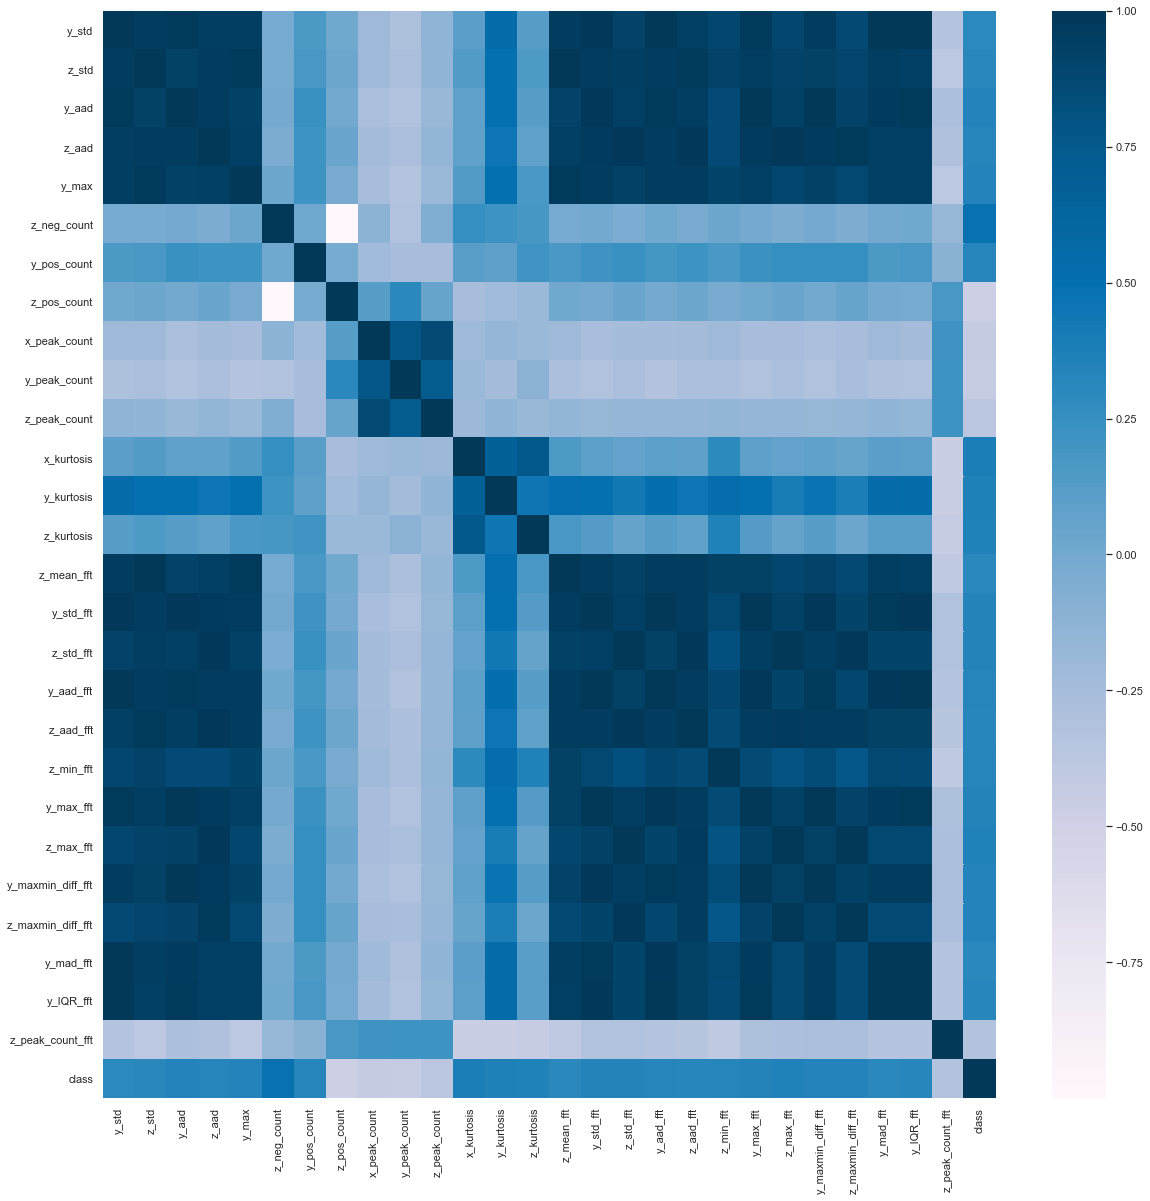

In [491]:
sub_features = feature_names

feature_names = feature_names + ['class']
sns.heatmap(data_cor.loc[feature_names][feature_names], cmap=plt.cm.PuBu);

In [492]:
# feature_names.remove('class')
# feature_names.remove()

In [493]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np

In [494]:
ytrain_2sec = np.array(ytrain_2sec).ravel()
ytest_2sec = np.array(ytest_2sec).ravel()

In [495]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, r2_score
import pickle

def evaluate_metrics(model, X_test, Y_test):
    y_hat = model.predict(X_test)
    print(f'Predicted\n {y_hat}')
    print(f'Actual\n {Y_test}')
    acc = accuracy_score(Y_test, y_hat)
    roc = roc_auc_score(Y_test, y_hat)
    prec = precision_score(Y_test, y_hat)
    rec = recall_score(Y_test, y_hat)
    f1 = f1_score(Y_test, y_hat)
    r2 = r2_score(Y_test, y_hat)

    return acc, roc, prec, rec, f1, r2

def train_eval(model, X_train, X_test, Y_train, Y_test):

    scaler = StandardScaler().fit(X_train)
    Xtrain_scaled = scaler.transform(X_train)
    Xtest_scaled = scaler.transform(X_test)
    pickle.dump(scaler, open('../streamlit_app/saved_models/scaler.pkl', 'wb'))
    
    model.fit(Xtrain_scaled, Y_train)
    
    acc, roc, prec, rec, f1, r2 = evaluate_metrics(model, Xtest_scaled, Y_test)
    display_df = pd.DataFrame([[prec, rec, f1, Xtest_scaled.shape[1]]], columns=["prec","Recall", "F1 Score",'Feature Count'])
    
    print(display_df)
    
    return display_df

# RandomForest classifier on Window=2

In [496]:
model_rf_2_all = RandomForestClassifier(criterion='entropy', random_state=47)
train_eval(model_rf_2_all, Xtrain_2sec, Xtest_2sec, ytrain_2sec, ytest_2sec)
pickle.dump(model_rf_2_all, open('../streamlit_app/saved_models/model_rf_2_all.pkl', 'wb'))


Predicted
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1]
Actual
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
      prec    Recall  F1 Score  Feature Count
0  0.45283  0.888889       0.6             94


In [497]:
model_rf_2_27 = RandomForestClassifier(criterion='entropy', random_state=47)

X_train = Xtrain_2sec[sub_features]
X_test = Xtest_2sec[sub_features]
train_eval(model_rf_2_27, X_train, X_test, ytrain_2sec, ytest_2sec)
pickle.dump(model_rf_2_27, open('../streamlit_app/saved_models/model_rf_2_27.pkl', 'wb'))


Predicted
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1]
Actual
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
       prec    Recall  F1 Score  Feature Count
0  0.444444  0.888889  0.592593             27


# RandomForest Classifier on Window=5

In [498]:
ytrain_5sec = np.array(ytrain_5sec).ravel()
ytest_5sec = np.array(ytest_5sec).ravel()

model_rf_5_all = RandomForestClassifier(criterion='entropy', random_state=47)
train_eval(model_rf_5_all, Xtrain_5sec, Xtest_5sec, ytrain_5sec, ytest_5sec)
pickle.dump(model_rf_5_all, open('../streamlit_app/saved_models/model_rf_5_all.pkl', 'wb'))


Predicted
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 1 1 0]
Actual
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1]
   prec    Recall  F1 Score  Feature Count
0   1.0  0.793103  0.884615             94


In [499]:
X_train = Xtrain_5sec[sub_features]
X_test = Xtest_5sec[sub_features]
model_rf_5_27 = RandomForestClassifier(criterion='entropy', random_state=47)

train_eval(model_rf_5_27, X_train, X_test, ytrain_5sec, ytest_5sec)
pickle.dump(model_rf_5_27, open('../streamlit_app/saved_models/model_rf_5_27.pkl', 'wb'))


Predicted
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 0]
Actual
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1]
   prec    Recall  F1 Score  Feature Count
0   1.0  0.758621  0.862745             27


# SVM classifier on Window=5

In [500]:
model_svm_5_all = SVC(kernel='linear', probability=True)
train_eval(model_svm_5_all, Xtrain_5sec, Xtest_5sec, ytrain_5sec, ytest_5sec)
pickle.dump(model_svm_5_all, open('../streamlit_app/saved_models/model_svm_5_all.pkl', 'wb'))


Predicted
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0]
Actual
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1]
   prec   Recall  F1 Score  Feature Count
0   1.0  0.62069  0.765957             94


In [501]:
model_svm_5_27 = SVC(kernel='linear', probability=True)
X_train = Xtrain_5sec[sub_features]
X_test = Xtest_5sec[sub_features]
train_eval(model_svm_5_27, X_train, X_test, ytrain_5sec, ytest_5sec)
pickle.dump(model_svm_5_27, open('../streamlit_app/saved_models/model_svm_5_27.pkl', 'wb'))


Predicted
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 1 1 1 1]
Actual
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1]
   prec    Recall  F1 Score  Feature Count
0   1.0  0.793103  0.884615             27


In [463]:
loaded_model = pickle.load(open('../streamlit_app/saved_models/model_svm_5_27.pkl', 'rb'))
train_eval(loaded_model, X_train, X_test, ytrain_5sec, ytest_5sec)


Predicted
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 1 1 1 1]
Actual
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1]


prec    Recall  F1 Score  Feature Count
0   1.0  0.793103  0.884615             27